# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [75]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of values is simply much wider-- the expected distance from the mean of any given observation is going to be larger too.

#### Question 4. Drop data points with missing data


In [21]:
df_cleaned = df_raw.dropna()
df_cleaned.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Obviously some observations are gone (we're down to 397), but most importantly it's no longer meaningless to discuss ntile values.

#### Question 6. Create box plots for GRE and GPA

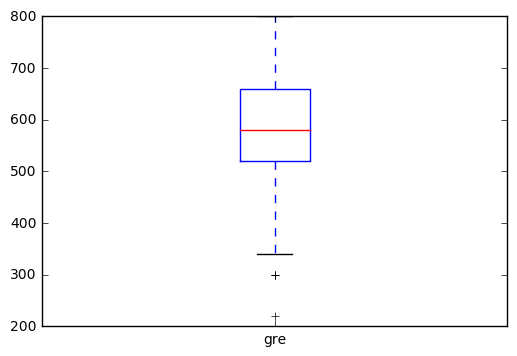

In [23]:
#boxplot 1
df_cleaned['gre'].plot(kind='box')

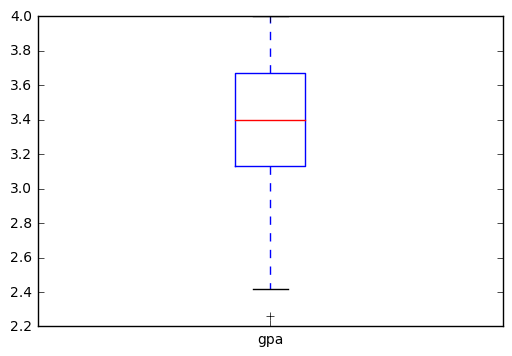

In [24]:
#boxplot 2 
df_cleaned['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: Both distributions are left-skewed; that is, the sample slightly clusters towards the higher end of the range, with a long tail of lower values.

#### Question 8. Describe each distribution 

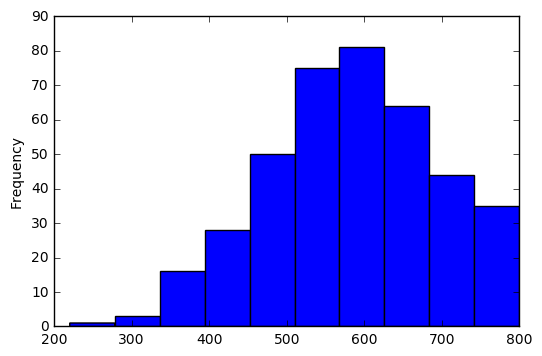

In [39]:
# plot the distribution of each variable 
df_cleaned['gre'].plot(kind='hist')

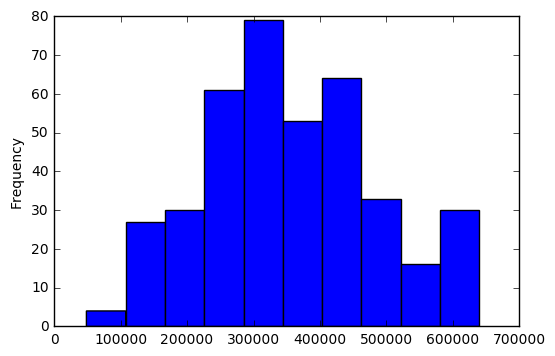

In [38]:
gre_squared = df_cleaned['gre']**2
gre_squared.plot(kind='hist')

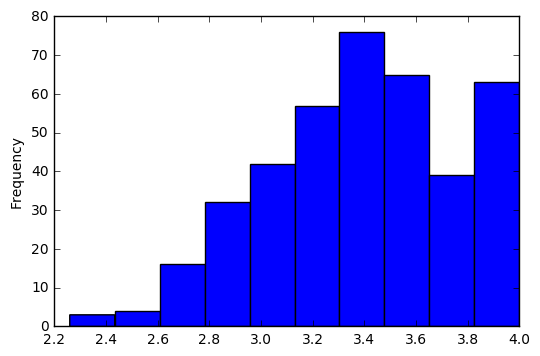

In [36]:
df_cleaned['gpa'].plot(kind='hist')

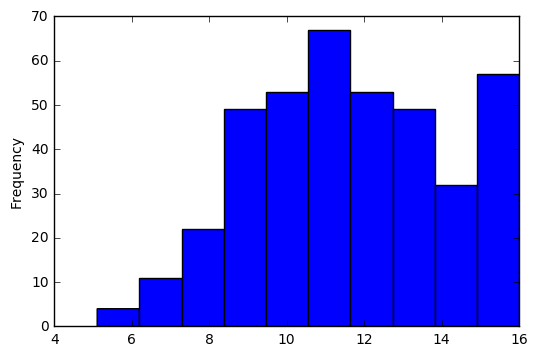

In [37]:
gpa_squared = df_cleaned['gpa']**2
gpa_squared.plot(kind='hist')

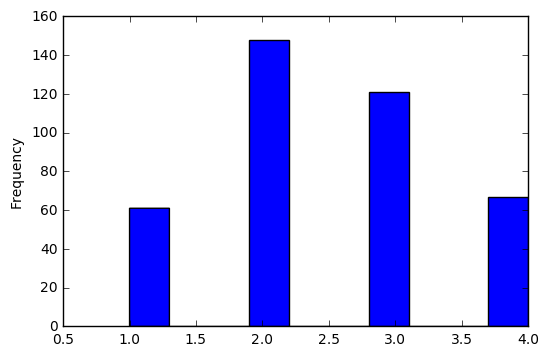

In [30]:
df_cleaned['prestige'].plot(kind='hist')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Not quite. All of our variables have hard maximum and minimum possible values, and their distribution skews left.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: The normality of the data improves when you square the values, but it may not be necessary depending on the model we build.

#### Question 11. Which of our variables are potentially colinear? 

In [40]:
# create a correlation matrix for the data
df_cleaned.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: There is a decent amount of colinearity between GPA and GRE, but the association isn't so strong that we might want to exclude any one variable.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: I'd start by plotting the two against each other to see if there appears to be any association. We already know from the correlation matrix that there is a decent, if not very strong, relationship.

#### Question 14. What is your hypothesis? 

Answer: That it's a relevant factor, worth including in any regression model, which may improve the predictive strength of the model.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [41]:
We could fill the missing values in, as it were, with the sample means or medians.
Or if we wanted to be really fancy, we could predict the missing with a quick linear regression of the other values.

SyntaxError: invalid syntax (<ipython-input-41-6ce4c206655a>, line 1)

#### 2. Bonus: Log transform the skewed data

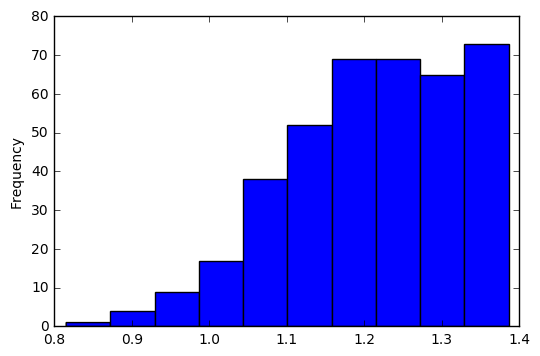

In [48]:
gpa_logtransformed = np.log(df_cleaned['gpa'])
gre_logtransformed = np.log(df_cleaned['gre'])
gpa_logtransformed.plot(kind='hist')

#### 3. Advanced: Impute missing data

In [93]:
# impute missing data using column mean
def impute_missing(df):
    for i in range(0,len(df.columns)-1):
        average = df.iloc[:,i].mean()
        for value in df.iloc[:,i]:
            if pd.isnull(value):
                value = average
    return df
                
df_imputed = impute_missing(df_raw)        

    